# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

In this project, we will look at two datasets which have daily level information on the number of affected cases and recovered from 2019 novel coronavirus. We'll combine 2 datasets since both datasets contain country and date information.

Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Kaggle: https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed.csv

Dataset variables:

*   Province_State: Province, state or dependency name.
*   Country_Region: Country, region or sovereignty name.
*   Lat and Long: Dot locations on the dashboard.

In [95]:
#1st data gathering and loading method
confirmed= pd.read_csv('time_series_covid_19_confirmed.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


#### Dataset 2

Type: Json File

Method: The data was gathered using the "API" method from https://github.com/CSSEGISandData/COVID-19/blob/4360e50239b4eb6b22f3a1759323748f36752177/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv source.

Dataset variables:

*   Province_State: Province, state or dependency name.
*   Country_Region: Country, region or sovereignty name.
*   Lat and Long_: Dot locations on the dashboard.

In [97]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/4360e50239b4eb6b22f3a1759323748f36752177/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [98]:
response = requests.get(url)
response.raise_for_status()
response_json = response.json()

In [99]:
#Get the data raw lines
response_data = response_json['payload']['blob']['rawLines']

In [102]:
#Convert list -> csv flatfile
response_text = "\n".join(response_data)

In [103]:
#Write the data to a csv file
with open('time_series_covid_19_recovered.csv', 'w') as f:
    f.write(response_text)

In [104]:
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Tidiness Issue 1: Column Header

It can be seen that both datasets column headers being stored as values instead of value names. We see this when visually inspecting some first rows of the dataframe.

In [105]:
#Inspecting the dataframe visually
confirmed_cleaned = confirmed.copy()
confirmed_cleaned.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


Visually, we can see that column from '1/22/20' till end should be stored in 1 columns.

In [106]:
recovered_cleaned = recovered.copy()
recovered_cleaned.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Same issue come with recovereddataset.

#### Cleaning the dataset

For the purposes of further assessment, we apply the cleaning fix here to proceed with the next steps of the assessment. The explaination of this code block will be repeated in the Cleaning data section.

In [107]:
confirmed_cleaned = confirmed_cleaned.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],var_name = 'Date', value_name = 'confirmed_case')
confirmed_cleaned = confirmed_cleaned.rename(columns = {'Province/State':'province','Country/Region':'country','Lat':'lat','Long':'long','Date':'date'})

In [108]:
recovered_cleaned = recovered_cleaned.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],var_name = 'Date', value_name = 'recovered_case')
recovered_cleaned = recovered_cleaned.rename(columns = {'Province/State':'province','Country/Region':'country','Lat':'lat','Long':'long','Date':'date'})

### Tidiness Issue 2: Variable Selection

We see some columns in both dataframes that are not necessary for out analysis purpose. In the cleaning step, we would like to drop these variables.

In [109]:
#Inspecting the dataframe visually
confirmed_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province        42484 non-null   object 
 1   country         136344 non-null  object 
 2   lat             135356 non-null  float64
 3   long            135356 non-null  float64
 4   date            136344 non-null  object 
 5   confirmed_case  136344 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [110]:
#Inspecting the dataframe visually
recovered_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313182 entries, 0 to 313181
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province        85725 non-null   object 
 1   country         313182 non-null  object 
 2   lat             312039 non-null  float64
 3   long            312039 non-null  float64
 4   date            313182 non-null  object 
 5   recovered_case  313182 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [111]:
recovered_cleaned['province'].isin(['']).sum()

0

* It can be seen that blank string stands for null value in recovered dataset. This dataset contains 94354 missing value in 'province' variable.
* We can drop 'province' column since it contains almost missing value and we do not have purpose on analyzing this feature. 
We can also drop 'lat', 'long' columns.

#### Cleaning the data
I will clean the data in order to merge 2 datasets and perform further assessment. 

In [112]:
confirmed_cleaned = confirmed_cleaned.drop(['province','lat','long'], axis=1)
recovered_cleaned = recovered_cleaned.drop(['province','lat','long'], axis=1)

In [113]:
#Merge 2 dataset on country and date
merge_data = confirmed_cleaned.merge(recovered_cleaned, how='left', left_on=['country','date'], right_on=['country','date'])

In [114]:
merge_data

,country,date,confirmed_case,recovered_case
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
880303,Vietnam,5/29/21,6908,2896
880304,West Bank and Gaza,5/29/21,307838,300524
880305,Yemen,5/29/21,6731,3399
880306,Zambia,5/29/21,94751,91594


### Quality Issue 1: Validity

In [115]:
#Inspecting the dataframe visually
confirmed_cleaned.dtypes

country           object
date              object
confirmed_case     int64
dtype: object

* 'date' feature should be in datetime datatype

### Quality Issue 2: Uniqueness

In [116]:
#Inspecting the dataframe programmatically
confirmed_cleaned.duplicated(subset=['country','date']).sum()

41002

In [117]:
confirmed_cleaned[confirmed_cleaned.duplicated(subset=['country','date'])].tail()

,country,date,confirmed_case
136330,United Kingdom,5/29/21,1592
136331,United Kingdom,5/29/21,20
136332,United Kingdom,5/29/21,4
136333,United Kingdom,5/29/21,2412
136334,United Kingdom,5/29/21,4480945


In [118]:
confirmed_cleaned.duplicated(subset=['country','date']).sum()

41002

* There are some duplicated records of a country in a day. This may be because some countries has divided to several province/state (which we had already drop in before step). 
* Observing some records of United Kingdom in 2021-05-09, we can see that they have the same confirmed_case, but different recovered_case.
* We will aggregate and get the last confirmed_case and recovered_case of each country in a day since they are culmulative numbers.

### Quality Issue 3: Accuracy

In [119]:
recovered_cleaned[recovered_cleaned.country=='US'][320:330]

,country,date,recovered_case
87925,US,12/7/20,5714557
88199,US,12/8/20,5786915
88473,US,12/9/20,5889896
88747,US,12/10/20,5985047
89021,US,12/11/20,6135314
89295,US,12/12/20,6246605
89569,US,12/13/20,6298082
89843,US,12/14/20,0
90117,US,12/15/20,0
90391,US,12/16/20,0


* The number of cases on any given day is the cumulative number so it should be in ascending level. But as we see in the sample below, the number of recovered case in US stopped growing at 13/12/2020 and was 0 in the rest records. 
* I assume that the author has stopped updating for some reasons, and that lead to some problems with this dataset accuracy.
* My solution is that I will set all 0 to NaN value. When I aggregate the data to get the last record of number of case (because it's cumulative number so I will take the last record), it will skip over the NaN and get the nearest non-NaN value.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### Tidiness Issue 1: Column Header

We'll start with making copies of the dataframe to ensure the raw dataframes are not impacted.

In [120]:
#Make copies of the datasets
confirmed_cleaned = confirmed.copy()
recovered_cleaned = recovered.copy()

Melt all columns except the first 4 columns in both table.

In [121]:
confirmed_cleaned = confirmed_cleaned.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],var_name = 'Date', value_name = 'confirmed_case')
confirmed_cleaned = confirmed_cleaned.rename(columns = {'Province/State':'province','Country/Region':'country','Lat':'lat','Long':'long','Date':'date'})

In [122]:
#Validate the cleaning was successful
confirmed_cleaned.head()

,province,country,lat,long,date,confirmed_case
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


Do the same with recovereddataset.

In [123]:
recovered_cleaned = recovered_cleaned.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],var_name = 'Date', value_name = 'recovered_case')
recovered_cleaned = recovered_cleaned.rename(columns = {'Province/State':'province','Country/Region':'country','Lat':'lat','Long':'long','Date':'date'})

In [124]:
#Validate the cleaning was successful
recovered_cleaned.head()

,province,country,lat,long,date,recovered_case
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


### Tidiness Issue 2: Variable Selection

* Drop unecessary columns

In [125]:
confirmed_cleaned = confirmed_cleaned.drop(['province','lat','long'], axis=1)
recovered_cleaned = recovered_cleaned.drop(['province','lat','long'], axis=1)

* Merge 2 datasets on 'country' and 'date'

### **Quality Issue 1: Validity**

In [126]:
#Change date datatype
confirmed_cleaned['date'] = pd.to_datetime(confirmed_cleaned['date'])
#Validate the cleaning was successful
confirmed_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   country         136344 non-null  object        
 1   date            136344 non-null  datetime64[ns]
 2   confirmed_case  136344 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.1+ MB


C:\Users\admin\AppData\Local\Temp\ipykernel_1676\1394972642.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_cleaned['date'] = pd.to_datetime(confirmed_cleaned['date'])


* date feature has been changed to datetime64[ns] datatype

In [127]:
recovered_cleaned['date'] = pd.to_datetime(recovered_cleaned['date'])

C:\Users\admin\AppData\Local\Temp\ipykernel_1676\185284227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_cleaned['date'] = pd.to_datetime(recovered_cleaned['date'])


### Quality Issue 2: Uniqueness

In [128]:
#Group the dataset by country and date
#Aggregate sum function over confirmed_case and recovered_case column
confirmed_cleaned = confirmed_cleaned.groupby(['country','date'])['confirmed_case'].sum().reset_index()
recovered_cleaned = recovered_cleaned.groupby(['country','date'])['recovered_case'].sum().reset_index()

In [129]:
#Validate the cleaning was successful
print(confirmed_cleaned.duplicated().sum())
print(recovered_cleaned.duplicated().sum())

0
0


* There is no duplicated records left.

Merge 2 datasets on 'country' and 'date' for further cleaning

In [130]:
#Merge 2 dataset on country and date
merge_data = confirmed_cleaned.merge(recovered_cleaned, how='left', left_on=['country','date'], right_on=['country','date'])

In [131]:
#Validate the cleaning was successful
merge_data.duplicated().sum()

0

### Quality Issue 3: Accuracy

This issue was detected after excuting cleaning for Quality Issue 2. So I did not present it in Assessment section. As we know, in real cases, the number of recovered cases have to be smaller or equal to the number of confirmed cases. 

In [132]:
merge_data[merge_data['recovered_case'] > merge_data['confirmed_case']]

,country,date,confirmed_case,recovered_case
86288,Timor-Leste,2020-12-19,31,35
89100,Uganda,2020-07-20,1069,1071


- There are 2 records that did not satisfy the requirement I said above. 
- Timor-Leste and Uganda in some given date have higher number of recovered cases than confirmed cases.
- I assume that this is some mistakes of the author, and we can fix it by set the number of recovered cases to be equal to the number of confirmed cases

In [133]:
wrong_index = merge_data[merge_data['recovered_case'] > merge_data['confirmed_case']].index

In [134]:
merge_data.loc[wrong_index,'recovered_case'] = merge_data.loc[wrong_index,'confirmed_case']

In [135]:
#Validate the cleaning was successful
merge_data[merge_data['recovered_case'] > merge_data['confirmed_case']]

,country,date,confirmed_case,recovered_case


### Prepare data for visualization

I will get the total case number by year and country to analyze after.

In [136]:
merge_cleaned = merge_data.copy()

In [137]:
#Get year
merge_cleaned['year'] = merge_cleaned['date'].dt.year

I will take the last record of that year since the number of confirmed case and recovered case are culmulative numbers.

In [138]:
merge_cleaned = merge_cleaned.groupby(['country','year']).last().reset_index()

Let quick check some country records:

In [139]:
merge_cleaned[merge_cleaned.country=='Canada']

,country,year,date,confirmed_case,recovered_case
64,Canada,2020,2020-12-31,584409,493638
65,Canada,2021,2021-05-29,1384373,1322602


In [140]:
merge_cleaned[merge_cleaned.country=='US']

,country,year,date,confirmed_case,recovered_case
358,US,2020,2020-12-31,20099363,0
359,US,2021,2021-05-29,33251939,0


Can you realize anything wrong here? Why the number of recovered case of the US in 2020 and 2021 is equal to 0? Another issue was detected after merging 2 datasets.

### Quality Issue 3: Accuracy

In [141]:
merge_data[merge_data.country=='US'][320:330]

,country,date,confirmed_case,recovered_case
88746,US,2020-12-07,15108918,5714557
88747,US,2020-12-08,15333410,5786915
88748,US,2020-12-09,15555949,5889896
88749,US,2020-12-10,15787464,5985047
88750,US,2020-12-11,16027441,6135314
88751,US,2020-12-12,16245026,6246605
88752,US,2020-12-13,16432729,6298082
88753,US,2020-12-14,16627550,0
88754,US,2020-12-15,16836556,0
88755,US,2020-12-16,17083256,0


* The number of cases on any given day is the cumulative number so it should be in ascending level. But as we see in the sample above, the number of recovered case in US stopped growing at 13/12/2020 and was 0 in the rest records. 
* I assume that the author has stopped updating for some reasons, and that lead to some problems with this dataset accuracy.
* My solution is that I will set all 0 to NaN value. When I aggregate the data to get the last record of number of case (because it's cumulative number so I will take the last record), it will skip over the NaN and get the nearest non-NaN value.

In [142]:
merge_cleaned[merge_cleaned.country=='US']

,country,year,date,confirmed_case,recovered_case
358,US,2020,2020-12-31,20099363,0
359,US,2021,2021-05-29,33251939,0


- As you can see, it took number of recovered case at 31/12/2020 which is 0. 
- The last non-zero value in 2020 of the US is at 13/12/2020, so it should be 6298082

**After fixing the 0 value:**

In [143]:
merge_cleaned_0 = merge_data.replace(0,np.nan)

In [144]:
merge_cleaned_0['year'] = merge_cleaned_0['date'].dt.year
merge_cleaned_0 = merge_cleaned_0.groupby(['country','year'],sort=False).last().reset_index()

In [145]:
merge_cleaned_0[merge_cleaned_0.country=='US']

,country,year,date,confirmed_case,recovered_case
358,US,2020,2020-12-31,20099363.0,6298082.0
359,US,2021,2021-05-29,33251939.0,NaN


The recovered case of US in 2020 is 6298082, exactly what we wanted. Number of recovered case in 2021 is NaN, due to the dataset missing value

In [146]:
merge_cleaned_0[merge_cleaned_0.recovered_case.isnull()]

,country,year,date,confirmed_case,recovered_case
33,Belgium,2021,2021-05-29,1059763.0,NaN
182,Kiribati,2020,2020-12-31,NaN,NaN
183,Kiribati,2021,2021-05-29,2.0,NaN
232,Micronesia,2020,2020-12-31,NaN,NaN
307,Serbia,2021,2021-05-29,712046.0,NaN
334,Sweden,2020,2020-12-31,437379.0,NaN
335,Sweden,2021,2021-05-29,1068473.0,NaN
359,US,2021,2021-05-29,33251939.0,NaN


To fill in missing value, there are some insight I can see from the sample above:
- Belgium, Serbia and US have 2020 record but don't have 2021 record. I will fill them with the 2020 value.
- Kiribati seem to have 0 confirmedcase in 2020, and 0 recovered case in 2020 and 2021
- Micronesia, same as Kiribati, seem like to have 0 confirmed and recovered case in 2020
- Sweden has missing value in both 2020 and 2021 recovered_case, I will fill it with -1 and do not consider this country when analyzing number of recovered case.

In [147]:
#Using forward fill with Belgium, Serbia and US
for row in ['Belgium','Serbia','US']:
    merge_cleaned_0.loc[merge_cleaned_0['country']==row] = merge_cleaned_0.loc[merge_cleaned_0['country']==row].ffill()

In [148]:
merge_cleaned_0[merge_cleaned_0.country.isin(['Belgium','Serbia','US'])]

,country,year,date,confirmed_case,recovered_case
32,Belgium,2020,2020-12-31,646496.0,31130.0
33,Belgium,2021,2021-05-29,1059763.0,31130.0
306,Serbia,2020,2020-12-31,337923.0,15564.0
307,Serbia,2021,2021-05-29,712046.0,15564.0
358,US,2020,2020-12-31,20099363.0,6298082.0
359,US,2021,2021-05-29,33251939.0,6298082.0


In [149]:
#Fill 0 with Kiribati and Micronesia
for row in ['Kiribati','Micronesia']:
    merge_cleaned_0.loc[merge_cleaned_0['country']==row] = merge_cleaned_0.loc[merge_cleaned_0['country']==row].fillna(0)

In [150]:
#Fill -1 with Sweden
merge_cleaned_0.loc[merge_cleaned_0.country=='Sweden'] = merge_cleaned_0.loc[merge_cleaned_0.country=='Sweden'].fillna(-1)

In [151]:
#Change the datatype of confirmed_case and recovered_case
merge_cleaned_0.confirmed_case = merge_cleaned_0.confirmed_case.astype('int64')
merge_cleaned_0.recovered_case = merge_cleaned_0.recovered_case.astype('int64')

In [152]:
merge_cleaned_0

,country,year,date,confirmed_case,recovered_case
0,Afghanistan,2020,2020-12-31,51526,41727
1,Afghanistan,2021,2021-05-29,70111,57281
2,Albania,2020,2020-12-31,58316,33634
3,Albania,2021,2021-05-29,132297,129215
4,Algeria,2020,2020-12-31,99610,67127
...,...,...,...,...,...
381,Yemen,2021,2021-05-29,6731,3399
382,Zambia,2020,2020-12-31,20725,18660
383,Zambia,2021,2021-05-29,94751,91594
384,Zimbabwe,2020,2020-12-31,13867,11250


### Preparing data for visualization

I have another columns named recovered_percent, which is the percentage of recovered case in that country.

In [153]:
merge_cleaned_0['recovered_percent'] = 100*(merge_cleaned_0['recovered_case']/merge_cleaned_0['confirmed_case'])

In [154]:
merge_cleaned_0.head()

,country,year,date,confirmed_case,recovered_case,recovered_percent
0,Afghanistan,2020,2020-12-31,51526,41727,80.982417
1,Afghanistan,2021,2021-05-29,70111,57281,81.700446
2,Albania,2020,2020-12-31,58316,33634,57.675424
3,Albania,2021,2021-05-29,132297,129215,97.670393
4,Algeria,2020,2020-12-31,99610,67127,67.389820


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [155]:
#saving data
merge_cleaned_0.to_csv('time_series_covid_19_confirmed_recovered.csv', index=False)

In [156]:
import pandas as pd
test_df = pd.read_csv('time_series_covid_19_confirmed_recovered.csv')
test_df.head()

,country,year,date,confirmed_case,recovered_case,recovered_percent
0,Afghanistan,2020,2020-12-31,51526,41727,80.982417
1,Afghanistan,2021,2021-05-29,70111,57281,81.700446
2,Albania,2020,2020-12-31,58316,33634,57.675424
3,Albania,2021,2021-05-29,132297,129215,97.670393
4,Algeria,2020,2020-12-31,99610,67127,67.389820


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question 1:* Which country has the most confirmed case number in each year?

In [157]:
year_2020 = test_df[test_df.year == 2020]
year_2021 = test_df[test_df.year == 2021]
confirmed_case_2020 = year_2020.sort_values('confirmed_case', ascending=False)
confirmed_case_2021 = year_2021.sort_values('confirmed_case', ascending=False)

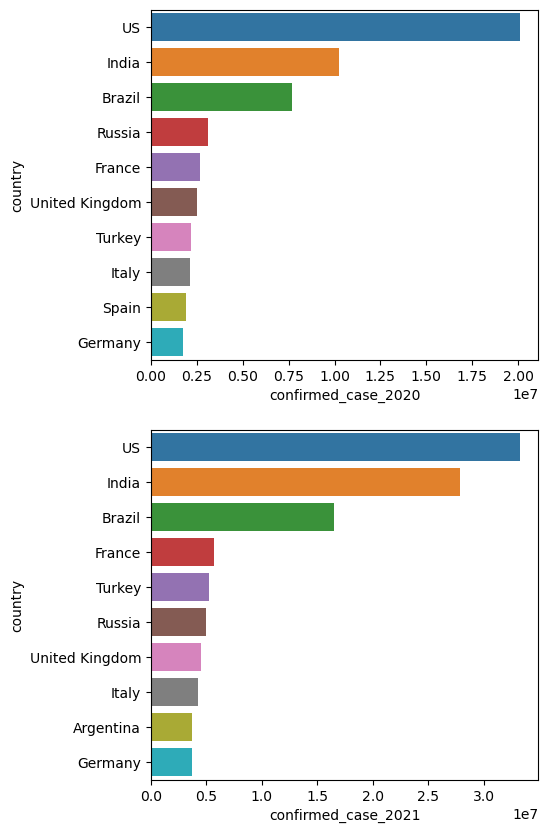

In [158]:
fig, ax =plt.subplots(2,1,figsize=(5,10))
ax1 = sns.barplot(data=confirmed_case_2020.head(10), x='confirmed_case', y="country",ax=ax[0])
ax1.set_xlabel('confirmed_case_2020')
ax2 = sns.barplot(data=confirmed_case_2021.head(10), x='confirmed_case', y="country",ax=ax[1])
ax2.set_xlabel('confirmed_case_2021')
plt.show()

> As we can see, 3 country US, India and Brazil have the highest number of confirmed case in 2020 and 2021.

*Research question 2:* Assess the recovery in covid-19 pandemic of countries around the world.

In [159]:
recovered_percent_2020 = year_2020.sort_values('recovered_percent', ascending=False)
recovered_percent_2021 = year_2021.sort_values('recovered_percent', ascending=False)

In [160]:
labels = ['<25','25-50','50-75','>75']
recovered_percent_2020['recovered_bin'] = pd.cut(recovered_percent_2020['recovered_percent'],bins=[0,25,50,75,100],labels=labels)
recovered_percent_2021['recovered_bin'] = pd.cut(recovered_percent_2021['recovered_percent'],bins=[0,25,50,75,100],labels=labels)

In [161]:
recovered_percent_2020.tail()

,country,year,date,confirmed_case,recovered_case,recovered_percent,recovered_bin
250,Netherlands,2020,2020-12-31,808382,9585,1.185702,<25
366,United Kingdom,2020,2020-12-31,2496235,5482,0.219611,<25
334,Sweden,2020,2020-12-31,437379,-1,-0.000229,NaN
182,Kiribati,2020,2020-12-31,0,0,NaN,NaN
232,Micronesia,2020,2020-12-31,0,0,NaN,NaN


In [162]:
recovered_percent_2021.tail()

,country,year,date,confirmed_case,recovered_case,recovered_percent,recovered_bin
307,Serbia,2021,2021-05-29,712046,15564,2.185814,<25
251,Netherlands,2021,2021-05-29,1671967,26810,1.603501,<25
367,United Kingdom,2021,2021-05-29,4496823,15481,0.344265,<25
183,Kiribati,2021,2021-05-29,2,0,0.000000,NaN
335,Sweden,2021,2021-05-29,1068473,-1,-0.000094,NaN


We will drop all missing value in recovered_bin since it does not provide any information.

In [163]:
recovered_percent_2020.dropna(inplace=True)
recovered_percent_2021.dropna(inplace=True)

In [164]:
d = {'2020':recovered_percent_2020['recovered_bin'].value_counts().to_list(),
     '2021':recovered_percent_2021['recovered_bin'].value_counts().to_list()}
df = pd.DataFrame(d)

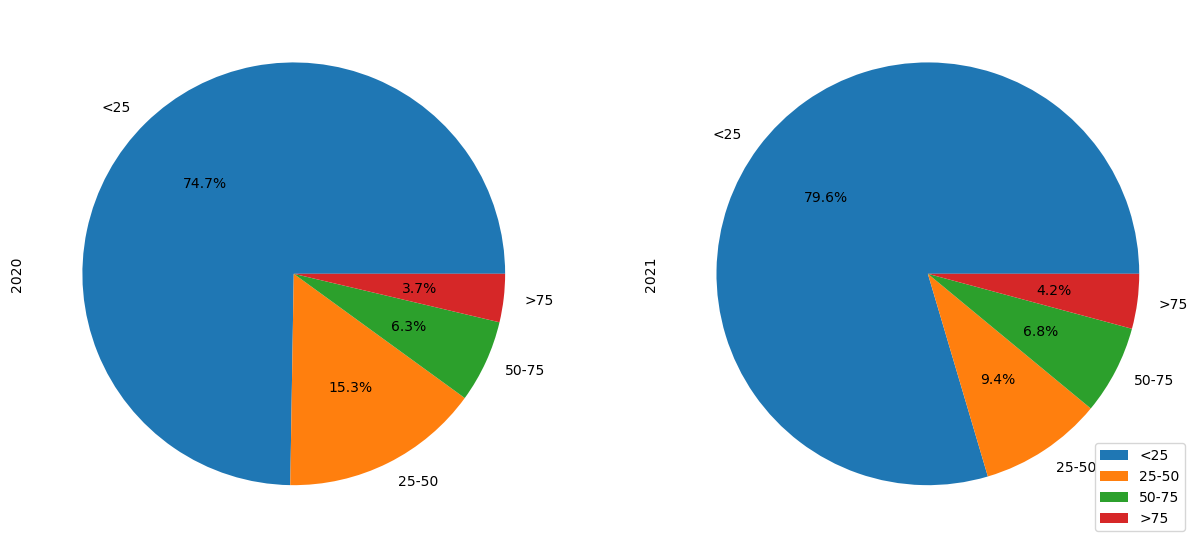

In [165]:
df.plot.pie(subplots = True, legend= False, figsize =(15,15), autopct='%1.1f%%',labels=labels)
plt.legend(loc = 'lower right')
plt.show()

In 2020:
- 74.7% countries have less than 25% recovered percentage
- 3.7% countries have more than 75% recovered percentage

In 2021:
- 79.6% countries have less than 25% recovered percentage
- 4.2% countries have more than 75% recovered percentage

> Overall, most countries have recovered a percentage of less than 25%. There is a slight improvement in recovery ability from 2020 to 2021 but insignificant. It can be seen that the world did not have effective methods to prevent covid 19 pandemic.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* I will handle more data acuracy issue, maybe I will use web scraping method to get more data from WHO website on the dates have 0 value. I also would like to do more visualization to take a deeper analysis for better story telling.